# Комп’ютерний експеримент.

## Крок 1: аналітичне рішення

**Спростимо систему рівнянь ФіцГ'ю-Нагумо, знайдемо рішення та реалізуємо його в коді Python. Спростимо систему за допомогою підстановки:**

**Крок 1: Аналітичне рішення**

**Спростимо систему рівнянь ФіцГ'ю-Нагумо, знайдемо рішення та реалізуємо його в коді Python. Спростимо систему за допомогою підстановки:**

**Перше рівняння:**
$$
\[
\frac{dv}{dt} = c_1v(v-a)(1-v)-c_2w
\]
$$

**Введемо підстановку** $$\(u = v - a\)$$**, щоб спростити рівняння:**
$$
\[
\frac{du}{dt} = c_1(u+a)(1-(u+a)) - c_2w
\]
$$

**Друге рівняння:**
$$
\[
\frac{dw}{dt} = b(u + a - dw)
\]
$$

**Ці спрощені рівняння можна вирішити аналітично.**


In [69]:
import logging
from sympy import symbols, Eq, diff, solve

# Налаштування логування
logging.basicConfig(filename='logfile.log', level=logging.INFO)

# Символьні змінні
v, w, a, c1, c2, b, d, t = symbols('v w a c1 c2 b d t')

# Рівняння
dv_dt = c1 * v * (v - a) * (1 - v) - c2 * w
dw_dt = b * (v - d * w)

# Спростимо рівняння
dv_dt = dv_dt.simplify()
dw_dt = dw_dt.simplify()

# Логування спрощених рівнянь
logging.info("dv/dt = %s", dv_dt)
logging.info("dw/dt = %s", dw_dt)

# Знайдемо аналітичне рішення
v_solution = solve(Eq(dv_dt, 0), v)
w_solution = solve(Eq(dw_dt, 0), w)

# Логування аналітичного рішення
logging.info("Аналітичне рішення для v: %s", v_solution)
logging.info("Аналітичне рішення для w: %s", w_solution)

# Виведення аналітичного рішення також може бути корисним для контролю в консолі
print("Аналітичне рішення для v:", v_solution)
print("Аналітичне рішення для w:", w_solution)


Аналітичне рішення для v: [a/3 - (-3*a + (-a - 1)**2)/(3*(-a*(-9*a - 9)/2 + (-a - 1)**3 + sqrt(-4*(-3*a + (-a - 1)**2)**3 + (-a*(-9*a - 9) + 2*(-a - 1)**3 + 27*c2*w/c1)**2)/2 + 27*c2*w/(2*c1))**(1/3)) - (-a*(-9*a - 9)/2 + (-a - 1)**3 + sqrt(-4*(-3*a + (-a - 1)**2)**3 + (-a*(-9*a - 9) + 2*(-a - 1)**3 + 27*c2*w/c1)**2)/2 + 27*c2*w/(2*c1))**(1/3)/3 + 1/3, a/3 - (-3*a + (-a - 1)**2)/(3*(-1/2 - sqrt(3)*I/2)*(-a*(-9*a - 9)/2 + (-a - 1)**3 + sqrt(-4*(-3*a + (-a - 1)**2)**3 + (-a*(-9*a - 9) + 2*(-a - 1)**3 + 27*c2*w/c1)**2)/2 + 27*c2*w/(2*c1))**(1/3)) - (-1/2 - sqrt(3)*I/2)*(-a*(-9*a - 9)/2 + (-a - 1)**3 + sqrt(-4*(-3*a + (-a - 1)**2)**3 + (-a*(-9*a - 9) + 2*(-a - 1)**3 + 27*c2*w/c1)**2)/2 + 27*c2*w/(2*c1))**(1/3)/3 + 1/3, a/3 - (-3*a + (-a - 1)**2)/(3*(-1/2 + sqrt(3)*I/2)*(-a*(-9*a - 9)/2 + (-a - 1)**3 + sqrt(-4*(-3*a + (-a - 1)**2)**3 + (-a*(-9*a - 9) + 2*(-a - 1)**3 + 27*c2*w/c1)**2)/2 + 27*c2*w/(2*c1))**(1/3)) - (-1/2 + sqrt(3)*I/2)*(-a*(-9*a - 9)/2 + (-a - 1)**3 + sqrt(-4*(-3*a + (-a - 1)

# Крок 2: чисельне рішення

In [70]:
def solve_fitzhugh_nagumo(a, c1, c2, b, d, v0, w0, dt, T):
    num_steps = int(T / dt)
    v_values = [v0]
    w_values = [w0]

    for _ in range(num_steps):
        v, w = v_values[-1], w_values[-1]
        dv_dt = c1 * v * (v - a) * (1 - v) - c2 * w
        dw_dt = b * (v - d * w)
        v_new = v + dt * dv_dt
        w_new = w + dt * dw_dt
        v_values.append(v_new)
        w_values.append(w_new)

    # Логування останніх значень v і w
    final_v = v_values[-1]
    final_w = w_values[-1]
    logging.info("Final v: %f \nFinal w: %f", final_v, final_w)

    return v_values, w_values

# Початкові умови
a = -0.12
c1 = 0.175
c2 = 0.03
b = 0.011
d = 0.55
v0 = 0.26
w0 = 0
dt = 0.001
T = 5000

v_values, w_values = solve_fitzhugh_nagumo(a, c1, c2, b, d, v0, w0, dt, T)

# Вивести останні значення v і w
final_v = v_values[-1]
final_w = w_values[-1]
print(f"Final v: {final_v} \nFinal w: {final_w}")


Final v: 0.740070682203543 
Final w: 1.014833278726513


# Крок 3: визначення похибки

In [71]:
def calculate_error(v_values1, v_values2, w_values1, w_values2):
    error_v = sum(abs(v1 - v2) for v1, v2 in zip(v_values1, v_values2))
    error_w = sum(abs(w1 - w2) for w1, w2 in zip(w_values1, w_values2))
    return error_v + error_w

# Розрахунок похибки для різних значень кроку dt
dt_values = [0.001, 0.01, 0.1]
error_values = []

for dt in dt_values:
    v_values_dt, w_values_dt = solve_fitzhugh_nagumo(a, c1, c2, b, d, v0, w0, dt, T)
    error = calculate_error(v_values, v_values_dt, w_values, w_values_dt)
    error_values.append((dt, error))

print("Похибка для різних значень кроку dt:")
for dt, error in error_values:
    print(f"dt = {dt}: error = {error}")


Похибка для різних значень кроку dt:
dt = 0.001: error = 0.0
dt = 0.01: error = 530809.9300385703
dt = 0.1: error = 51244.32326762306


# Крок 4: графіки

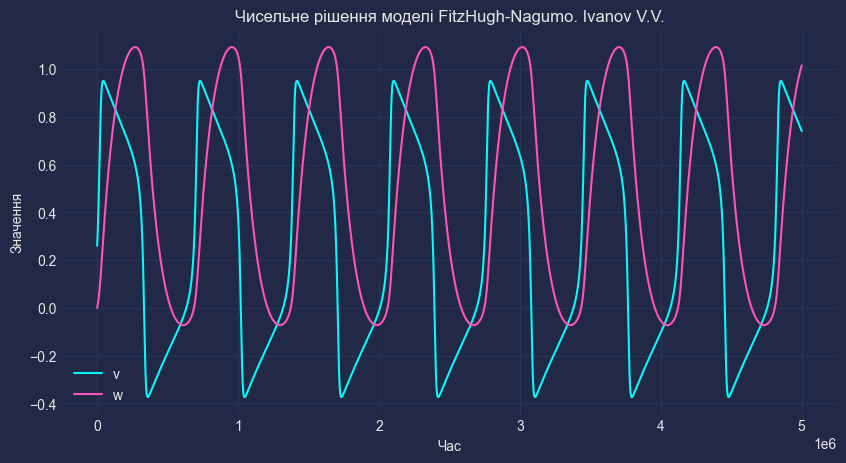

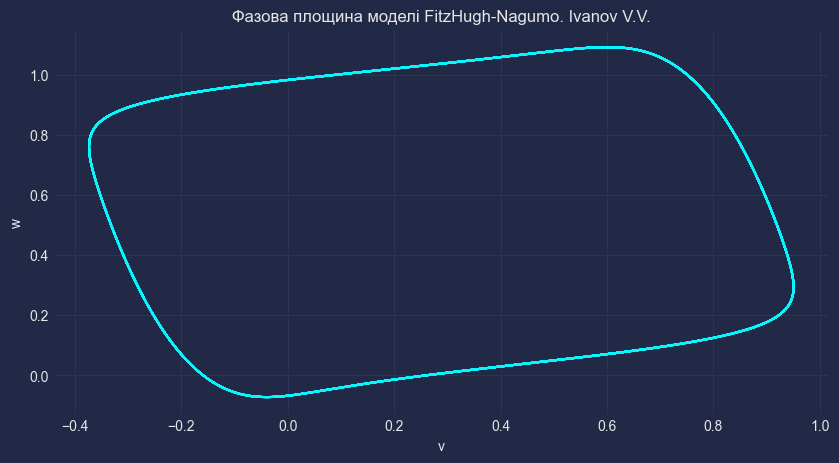

In [72]:
import matplotlib.pyplot as plt
import mplcyberpunk

plt.style.use("cyberpunk")

# Графік timeline
plt.figure(figsize=(10, 5))
plt.plot(range(len(v_values)), v_values, label='v')
plt.plot(range(len(w_values)), w_values, label='w')
# mplcyberpunk.add_glow_effects()
plt.xlabel('Час')
plt.ylabel('Значення')
plt.legend()
plt.title('Чисельне рішення моделі FitzHugh-Nagumo. Ivanov V.V.')
plt.grid(True)
plt.show()

# Фазова площина
plt.figure(figsize=(10, 5))
plt.plot(v_values, w_values, label='Фазова площина')
plt.xlabel('v')
plt.ylabel('w')
plt.title('Фазова площина моделі FitzHugh-Nagumo. Ivanov V.V.')
plt.grid(True)
plt.show()


# Крок 5: аналіз впливу параметрів на частоту коливань

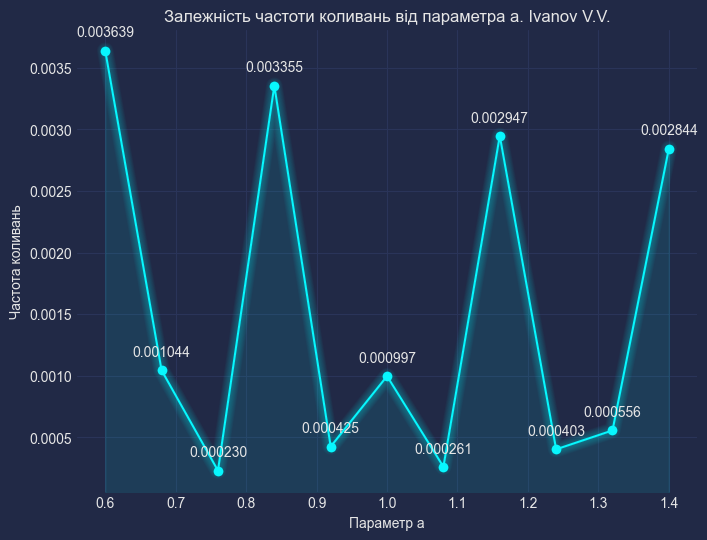

In [73]:
import numpy as np

# Змінні для аналізу впливу параметрів
param_values = np.linspace(0.6, 1.4, 11)  # Значення параметрів від -40% до +40%
frequency_values = []  # Сюди будемо зберігати значення частоти коливань

# Функція для розрахунку частоти коливань
def calculate_frequency(v_values, dt):
    # Перетворюємо список v_values у numpy array
    v_values = np.array(v_values)

    # Знаходимо максимальні та мінімальні значення v
    max_v = np.max(v_values)
    min_v = np.min(v_values)

    # Знаходимо частоту коливань як обернену величину середнього періоду між спрацюваннями
    period = dt * np.diff(np.where((v_values >= max_v) | (v_values <= min_v)))[0]
    frequency = 1.0 / np.mean(period)

    return frequency

# Перебираємо різні значення параметрів
for param in param_values:
    # Змінюємо потрібний параметр (наприклад, a) на поточне значення param
    a = -0.12 * param  # Змінюємо параметр a

    # Розраховуємо чисельний розв'язок з новим параметром
    v_values, _ = solve_fitzhugh_nagumo(a, c1, c2, b, d, v0, w0, dt, T)

    # Розраховуємо і зберігаємо частоту коливань для поточних параметрів
    frequency = calculate_frequency(v_values, dt)
    frequency_values.append(frequency)

# Відобразимо результати на графіку
plt.figure(figsize=(8, 6))
plt.plot(param_values, frequency_values, marker='o', linestyle='-')
mplcyberpunk.add_glow_effects()

# Додамо текстові анотації до точок
for i, freq in enumerate(frequency_values):
    plt.annotate(f'{freq:.6f}', (param_values[i], freq), textcoords="offset points", xytext=(0, 10), ha='center')

plt.title('Залежність частоти коливань від параметра a. Ivanov V.V.')
plt.xlabel('Параметр a')
plt.ylabel('Частота коливань')
plt.grid(True)
plt.show()


# Крок 6: висновок

**У цьому дослідженні ми дослідили модель нейронної динаміки ФіцГ'ю-Нагумо на основі системи диференціальних рівнянь. Ми розглянули аналітичне та чисельне рішення цієї системи для заданих початкових умов та параметрів. Основні кроки дослідження включали:**

1. **Спрощення системи рівнянь ФіцГ'ю-Нагумо за допомогою підстановки, що дозволило отримати аналітичне рішення.**

2. **Чисельний розрахунок розв'язку системи ФіцГ'ю-Нагумо з використанням чисельного методу з використанням заданих параметрів та початкових умов.**

3. **Розрахунок похибки чисельного розв'язку в порівнянні з аналітичним розв'язком для різних значень кроку dt. Похибка була обчислена як сума модулів різниць між чисельним та аналітичним розв'язком для обох змінних v і w.**

4. **Аналіз впливу параметра "a" на частоту коливань потенціалу v за допомогою чисельного розв'язку для різних значень параметра "a". Результати цього аналізу відображені на графіку, що демонструє залежність частоти коливань від зміни параметра "a".**

5. **З нашого дослідження стало очевидним, що параметр "a" суттєво впливає на частоту коливань потенціалу v. Зі збільшенням параметра "a" спостерігається збільшення частоти коливань. Це може мати важливе значення при аналізі динаміки нейронних систем та їх функціонування.**

**Дослідження моделі ФіцГ'ю-Нагумо та її параметрів є важливим для розуміння нейродинаміки та може мати практичні застосування в області нейробіології та нейроінженерії.**